# Exp9

## wanderer1_4agents
- 4 agents and 1 goal landmark
    - the same as Exp 8 except that the number of agnets is 2 -> 4.


### In the following, I made experiments with different parameter set.
A parameter of "PENALTY_WEIGHT" controls heaviness of the penalty   
for the consumption of the energy. The results are described as follow.

### general results
The optimized behavior looks the same as that of Exp8:  
In the most cases, the trained agnets first move to the opponent.  
While moving, they also use the energy to get a wider visible range.   
This seems the optimized behavior for this game, becuase
- if the oppnent knows the goal, approaching to the opponent means reaching to the goal.
- even if the oppnent doesn't know, there is no demerit for the agent (in the view of expected rewards).
    - in that case, the agent uses more energy to find the goal position.
    
### wanderer1_4agents-1
no penalty for the debt (PENALTY_WEIGHT = 0)
#### results
see below for details.

### wanderer1_4agents-2
light penalty (PENALTY_WEIGHT = 0.005; low)
#### results
see below for details.

### wanderer1_4agents-3
modest penalty (PENALTY_WEIGHT = 0.01; modest)
#### results
see below for details.


## summary
The global trend is almost the same as that of Exp8.  
The agents tend to converge to the optimized behavior under the strong  
penalty; under the low penalty, agents take diffrent behaviors.

The agents seem to be converging to the optimized behavior  
even in the case of the low penalty (by observing the learning curve).  
The reward obtained by the optimized behavior (not "following behavior")  
might be the best score in this game. If this is the case, there is no reason  
to be followers so that their behavior will be converge to the optimized one.

# In the following, the detailed results of the experiments are shown.

In [1]:
%matplotlib inline
import glob
import utils_note
plt.rcParams["font.size"] = 12

colors = ['#d62728', '#2ca02c', '#1f77b4', '#ff7f0e']
    
def get_all_exp_curves(pdir):
    curve_dirs = [osp.join(d, 'learning_curves') for d in glob.glob(pdir+'/*')]
    return sorted(curve_dirs)

def plot_curves(ax, curve_dir, y_colns_template=None):
    each_exp_dir = curve_dir.split('/')[-2]
    df_r =  pd.read_csv(osp.join(curve_dir, 'agents_rewards.csv'))
    df_m = pd.read_csv(osp.join(curve_dir, 'agents_energy.csv'))
    _df = pd.merge(df_r, df_m, on=['episode', 'step']).drop(['step'], axis=1)
    
    if y_colns_template is not None:
        agents = set([c.split('_')[0] for c in _df.columns if c.startswith('agent')])
        for i_agent, agent in enumerate(sorted(list(agents))):
            kwargs = {}
            for i, y_coln in  enumerate(y_colns_template):
                    linestyles = ['-', '--', '-.', ':']
                    y_coln = '%s_%s' % (agent, y_coln)
                    kwargs['linestyle'] = linestyles[i % len(linestyles)]
                    kwargs['color'] = colors[i_agent]
                    _df.plot(x='episode', y=y_coln, ax=ax, title=each_exp_dir, **kwargs)
#                     kwargs['color'] = ax.get_lines()[-1].get_color()
    else:
        _df.plot(x='episode', ax=ax, title=each_exp_dir, **kwargs)
    ax.set_ylim([-100, 1])

def plot_training(each_exp_dir, y_columns):
    curve_dir = osp.join(each_exp_dir, 'learning_curves')
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    plot_curves(ax, curve_dir, y_columns)
    
def plot_energy(fn_video):
    fn_csvs =\
        glob.glob(fn_video.replace('.mp4', '_states_agent*.csv'))
    dfs = []
    for fn_csv in sorted(fn_csvs):
        dfs.append(pd.read_csv(fn_csv))

    fig, ax = plt.subplots(1, 1, figsize=(24, 4))
    legends = []
    for i, df_agent in enumerate(dfs):
        df_agent.plot(y='energy', ax=ax, color=colors[i])
        legends.append('agent%d energy' % i)
    ax.legend(legends)

    # plot end-episode line
    df_ = dfs[0]
    end_epi = 0
    for epi in sorted(df_['episode'].unique()):
        end_epi +=  df_.loc[df_['episode'] == epi, 'step'].max() + 1
        ax.axvline(end_epi, color='orange', ls='--')

# 1. Learning curve (episode vs rewards) for all parameter set
The consumption of the energy is also plotted.  
As the agent uses the enery, the energy decreases.  
When the agent says "A", the agent's energy decreases by 1.  
There are 50 steps in the episode so that the max consumption value is -50.  

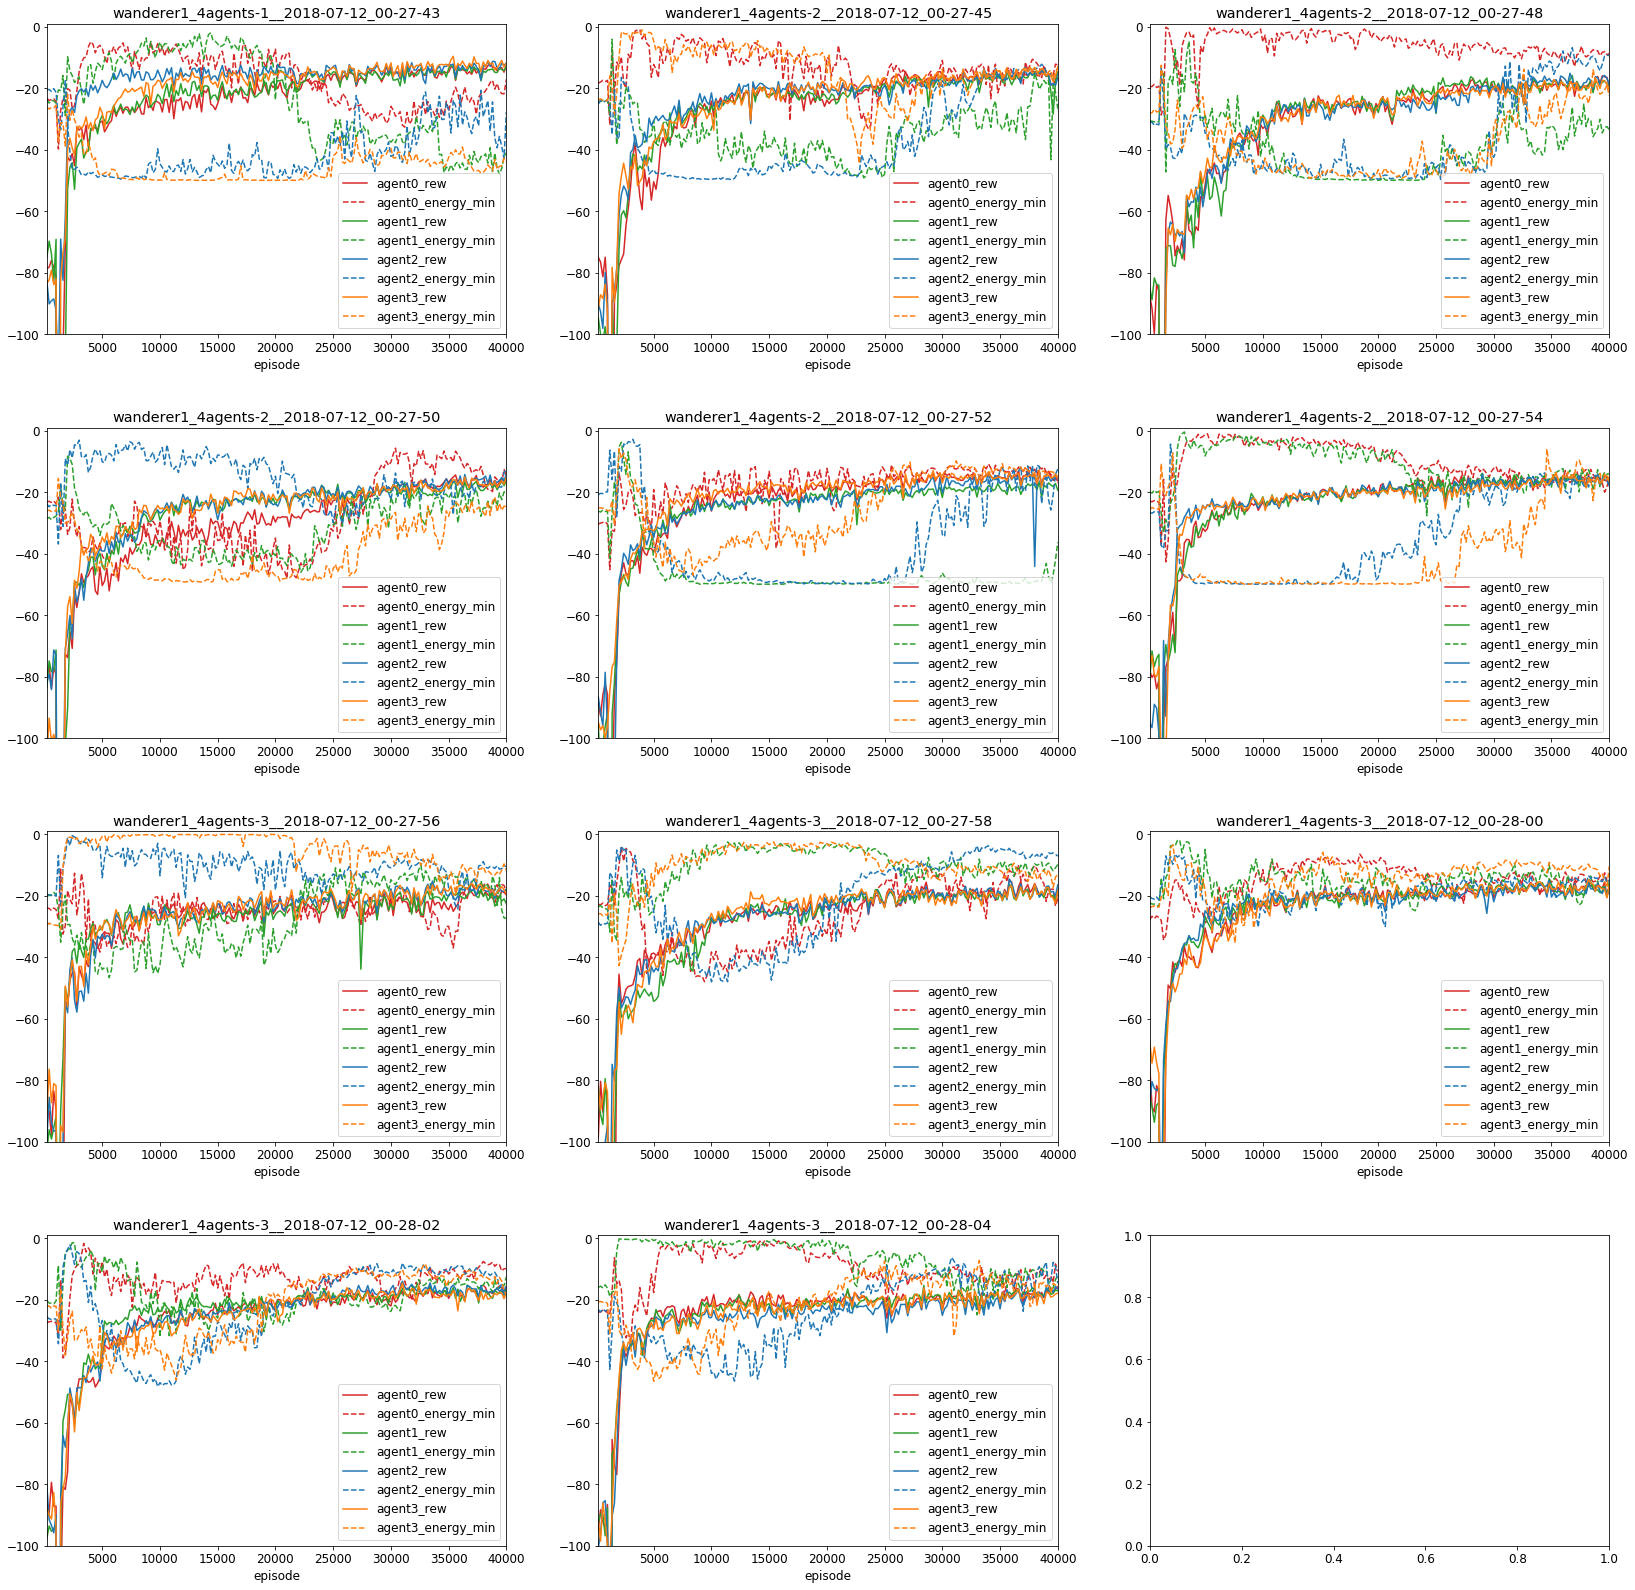

In [2]:
exp_dir = '../exp_results/exp9_180712'
y_columns = ['rew', 'energy_min']
fig, axes = plt.subplots(4, 3, figsize=(28, 28))
plt.subplots_adjust(hspace=0.3)
axes = axes.flatten()

curve_dirs = get_all_exp_curves(exp_dir)
for i, curve_dir in enumerate(curve_dirs):
    ax = axes[i]
    plot_curves(ax, curve_dir, y_columns)


In [7]:
y_columns = ['rew', 'energy_min']

def show_results(exp_dir, each_exp_dir, epis):
    # training plot
    each_exp_dir = osp.join(exp_dir, each_exp_dir)
    plot_training(each_exp_dir, y_columns)
    plt.show()

    fn_video_template = 'video-{}.mp4'
    for epi in epis:
        print('-' * 50)
        print('Episode %d' % epi)
        print('-' * 50)
        fn_video = fn_video_template.format(epi)
        display(utils_note.play_linked_video(each_exp_dir, fn_video))
        video_path = osp.join(each_exp_dir, 'videos', fn_video)
        plot_energy(video_path)
        plt.show()
    print('~o**' * 20)

# 2. Agents' behvior of the trained model
The content of each experiment contains  
1. learning cuve (training log)
2. video of the trained agents' behavior
3. the corresponding log of the energy consumption 
**Here we shows the trained behavior after 10,000 and 40,000 episodes for each parameter set.**

The learning curve is the same as that of Section1.  
In the video of #2, the agents represent large colorful circles and the goal is a black point.  
The tranparent circle around the agent represents the visible range,   
which increases as the agent uses its energy.   
Here the video contains 5 episodes.  

The figure of #3 shows the corresponding log of the energy consumption  
of #2 video. The line color corresponds to the agent color of #2 video.  
There are 50 stesp in each episode so that the energy is reset at 0 (default value)   
every 50 steps. 

## 2-1. wanderer1_4agents-1
no penalty for the debt (PENALTY_WEIGHT = 0)

### results
- 10,000 episodes
    - two agents uses the energy with almost no limit and the others are followers.
- 40,000 episodes
    - agents' behavior converges to an optimized one.
    - most agents uses the energy with almost no limit
        - agent2 save its energy after reaching the goal.


oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer1_4agents-1__2018-07-12_00-27-43"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



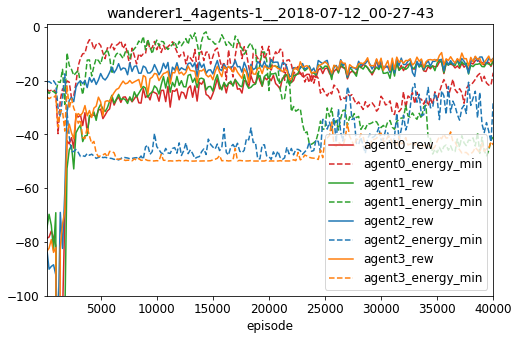

--------------------------------------------------
Episode 10000
--------------------------------------------------
./videos/wanderer1_4agents-1__2018-07-12_00-27-43/videos/video-10000.mp4


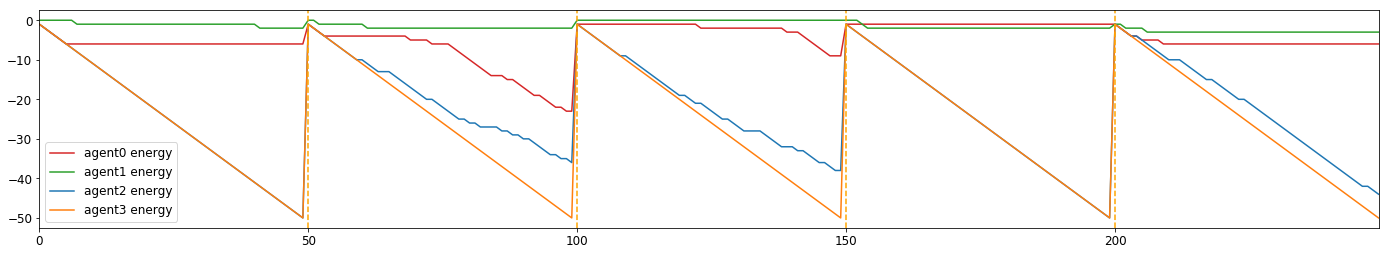

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer1_4agents-1__2018-07-12_00-27-43/videos/video-40000.mp4


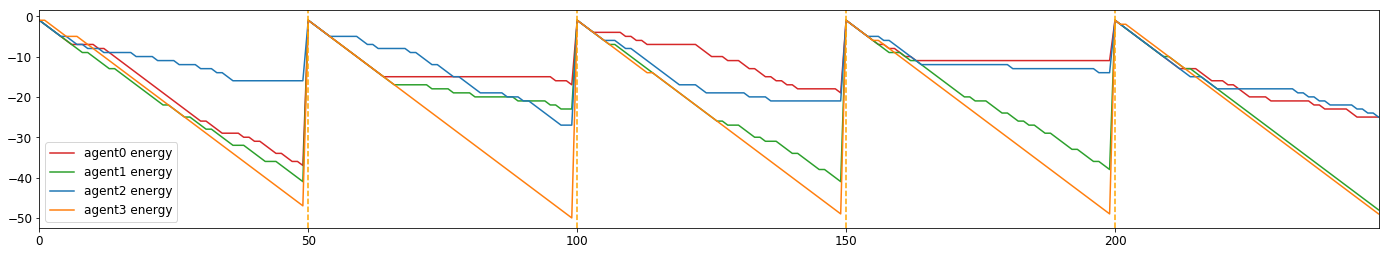

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**


In [9]:
exp_dir = '../exp_results/exp9_180712/'
each_dirs = ['wanderer1_4agents-1__2018-07-12_00-27-43']
epis = [10000, 40000]

for each_exp_dir in each_dirs:
    print('\n' + 'o'*60 + '\nExperiment of "%s"\n' %  each_exp_dir + 'o'*60 + '\n')
    show_results(exp_dir, each_exp_dir, epis)

## 2-2. wanderer1_4agents-2
light penalty (PENALTY_WEIGHT = 0.005; low)  
two of five seeds are shown here.

### results
- wanderer1_4agents-2__2018-07-12_00-27-48
    - episode: 10,000
        - agent0 is a follower, while the others use the energy with no limit.
    - episode: 40,000
        - agent0 and agent2 are fllowers.
        - agent1 and agent3 use the energy to find the goal.
    
- wanderer1_4agents-2__2018-07-12_00-27-50
    - episode: 10,000
        - agent2 is a follower, while the others use the energy with no limit.
    - episode: 40,000
        - all the agents converge to the optimized behavior. 

### summary
As discussed in Exp8, agents can take different behaviors under the low penalty.  
Even in that case, the agents seem to be going to converge to the optimized one  
(based on the learning curve).  
This is probably because the follower doesn't make much profit compared with  
the optimized agent in this game.


oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer1_4agents-2__2018-07-12_00-27-48"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



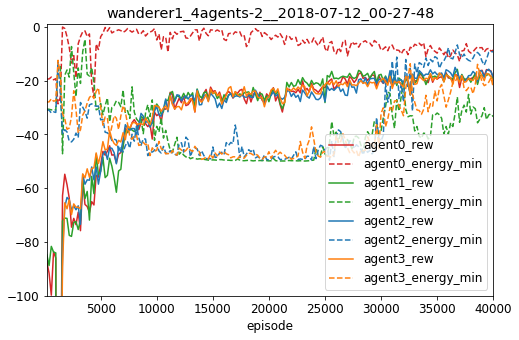

--------------------------------------------------
Episode 10000
--------------------------------------------------
./videos/wanderer1_4agents-2__2018-07-12_00-27-48/videos/video-10000.mp4


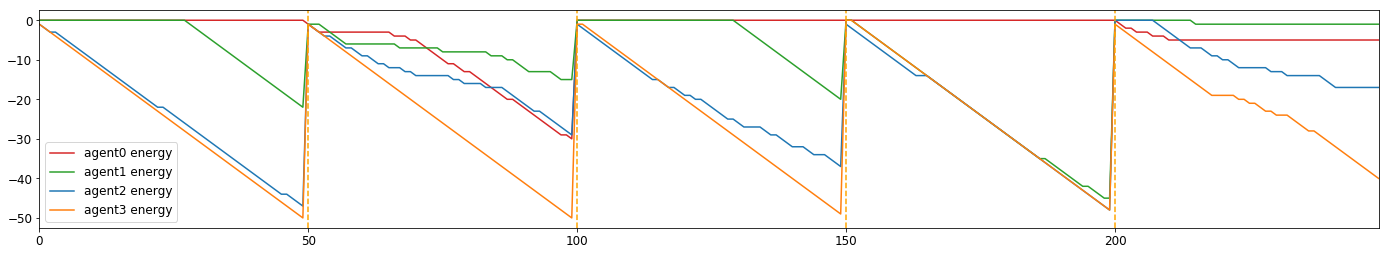

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer1_4agents-2__2018-07-12_00-27-48/videos/video-40000.mp4


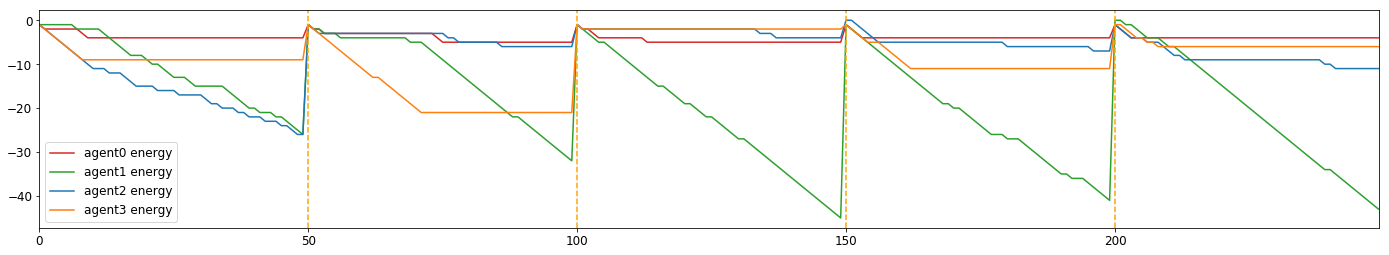

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**

oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer1_4agents-2__2018-07-12_00-27-50"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



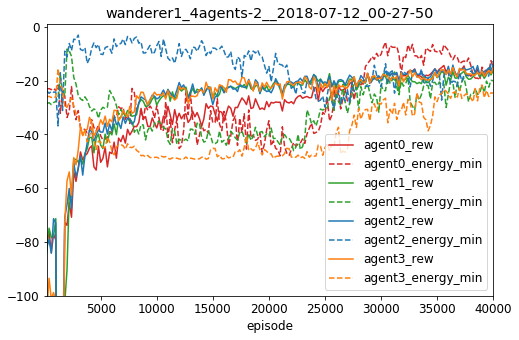

--------------------------------------------------
Episode 10000
--------------------------------------------------
./videos/wanderer1_4agents-2__2018-07-12_00-27-50/videos/video-10000.mp4


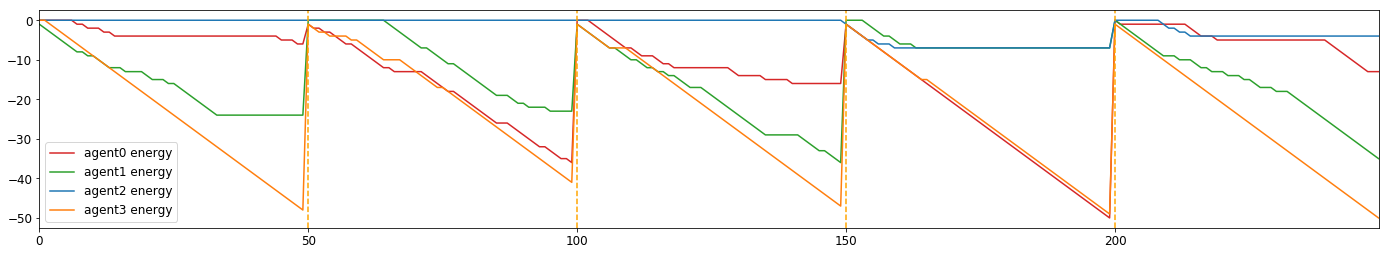

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer1_4agents-2__2018-07-12_00-27-50/videos/video-40000.mp4


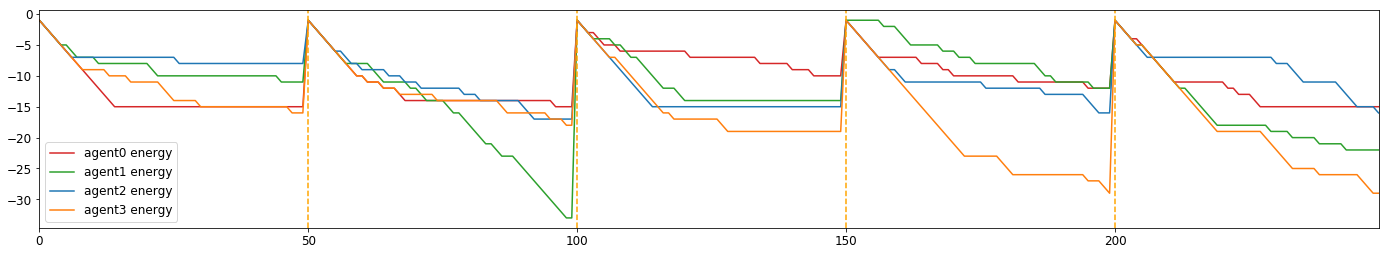

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**


In [13]:
exp_dir = '../exp_results/exp9_180712/'
each_dirs = ['wanderer1_4agents-2__2018-07-12_00-27-48',
                       'wanderer1_4agents-2__2018-07-12_00-27-50']
epis = [10000, 40000]

for each_exp_dir in each_dirs:
    print('\n' + 'o'*60 + '\nExperiment of "%s"\n' %  each_exp_dir + 'o'*60 + '\n')
    show_results(exp_dir, each_exp_dir, epis)

### wanderer1_4agents-3
modest penalty (PENALTY_WEIGHT = 0.01; modest)  
two of five seeds are shown here.

#### results
The agents converge to the optimzed behavor in almot all the cases.

### summary
As discussed in Exp8, agents tend to converge to the optimized behavior   
under the strong penalty.


oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer1_4agents-3__2018-07-12_00-27-58"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



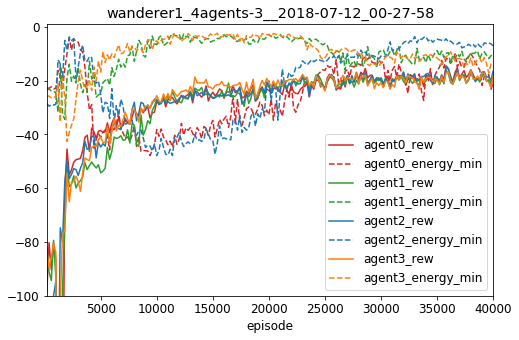

--------------------------------------------------
Episode 10000
--------------------------------------------------
./videos/wanderer1_4agents-3__2018-07-12_00-27-58/videos/video-10000.mp4


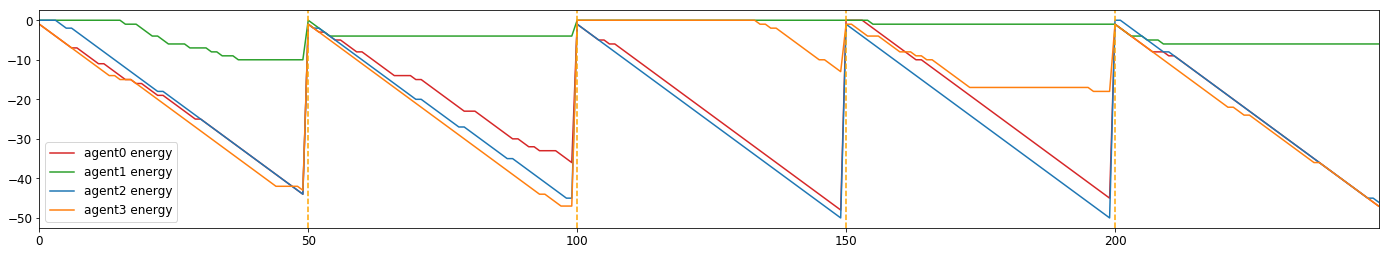

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer1_4agents-3__2018-07-12_00-27-58/videos/video-40000.mp4


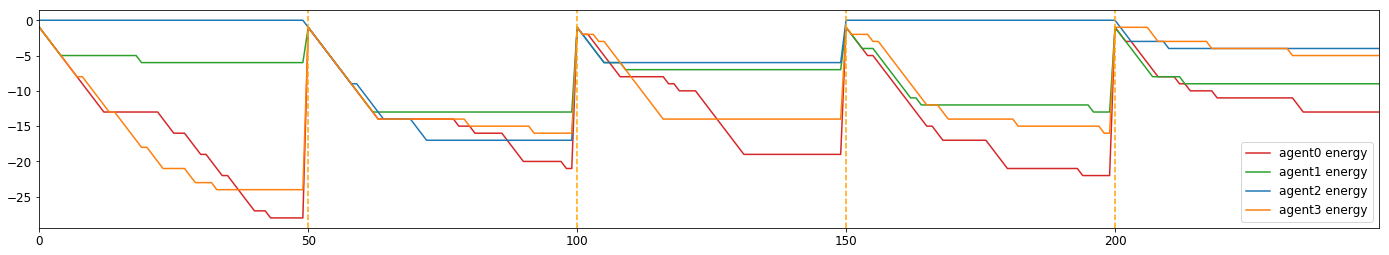

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**

oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
Experiment of "wanderer1_4agents-3__2018-07-12_00-28-04"
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo



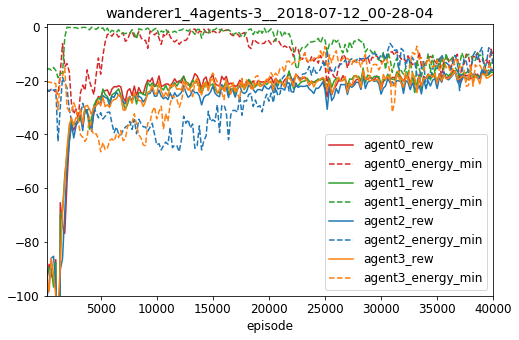

--------------------------------------------------
Episode 10000
--------------------------------------------------
./videos/wanderer1_4agents-3__2018-07-12_00-28-04/videos/video-10000.mp4


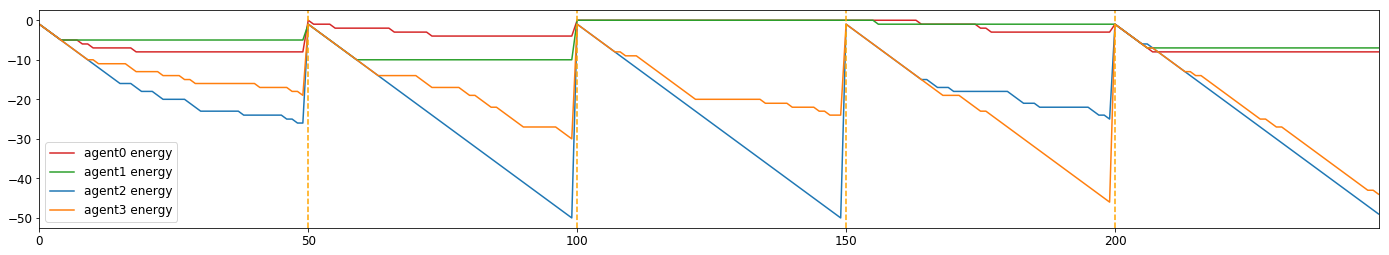

--------------------------------------------------
Episode 40000
--------------------------------------------------
./videos/wanderer1_4agents-3__2018-07-12_00-28-04/videos/video-40000.mp4


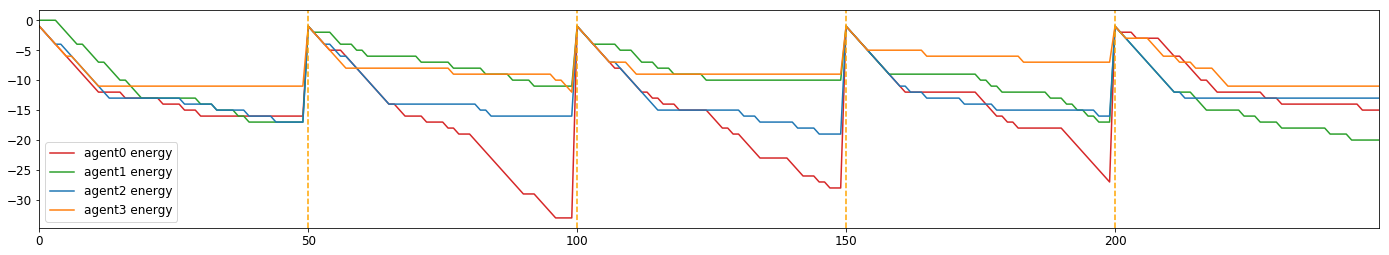

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**


In [11]:
exp_dir = '../exp_results/exp9_180712/'
each_dirs = ['wanderer1_4agents-3__2018-07-12_00-27-58',
                       'wanderer1_4agents-3__2018-07-12_00-28-04']
epis = [10000, 40000]

for each_exp_dir in each_dirs:
    print('\n' + 'o'*60 + '\nExperiment of "%s"\n' %  each_exp_dir + 'o'*60 + '\n')
    show_results(exp_dir, each_exp_dir, epis)